In [495]:
#importar bibliotecas 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# libreria de para ciencia de datos

from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 


In [500]:
hear_Disease= pd.read_csv("D:/heart_cleveland_upload.csv")

In [477]:
# realiza la lectura de los datos para el analisis explotario
hear_Disease.head(30) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [479]:
# descripcion de los datos variable – Heart Disease Cleveland UCI:
hear_Disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion de datos faltantes')

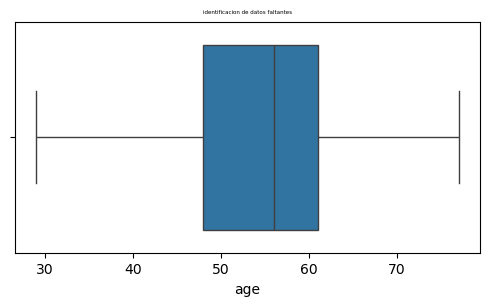

In [481]:
# identificacion de datos faltantes
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['age'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

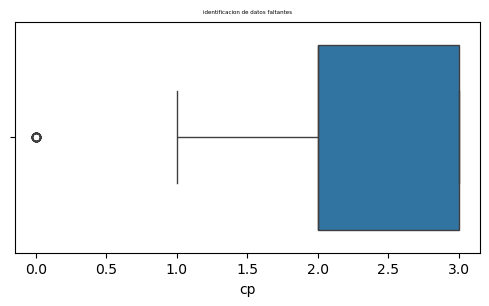

In [483]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['cp'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

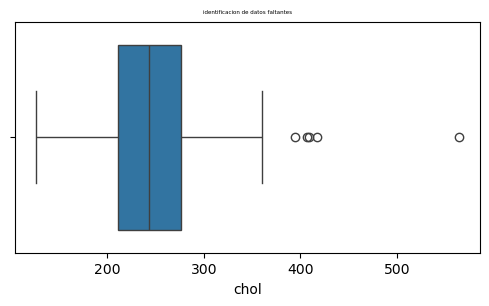

In [484]:

plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['chol'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

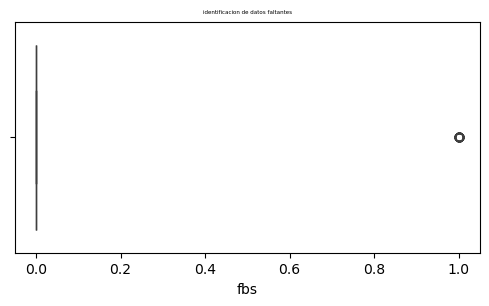

In [486]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['fbs'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

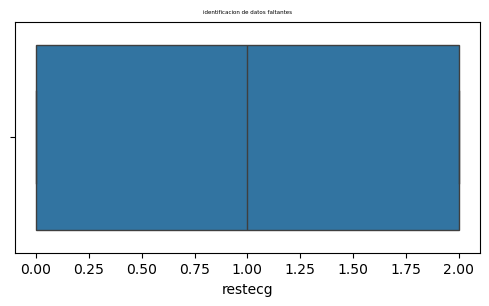

In [314]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['restecg'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

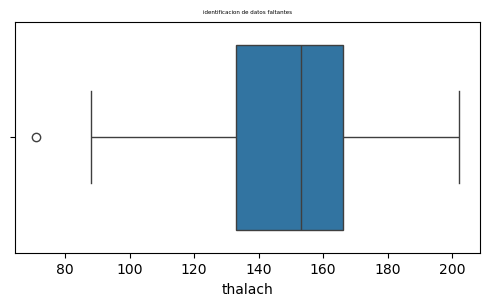

In [318]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['thalach'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

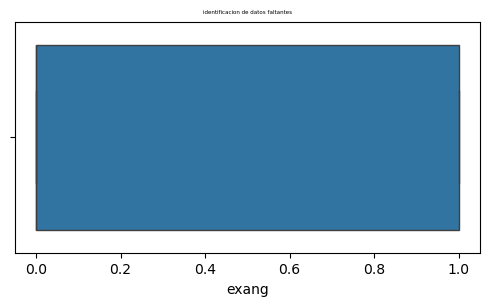

In [215]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['exang'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

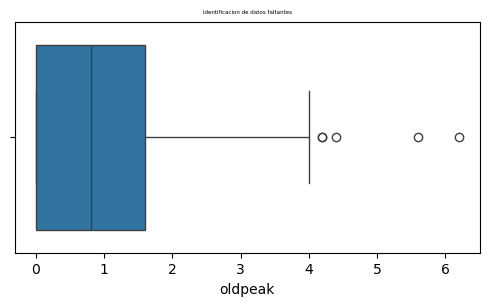

In [217]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['oldpeak'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

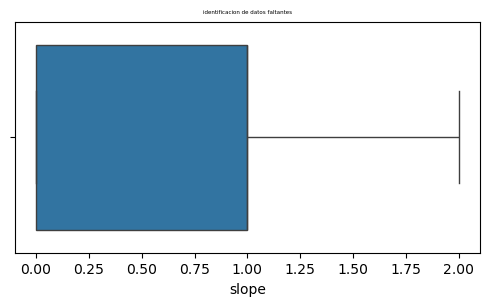

In [219]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['slope'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

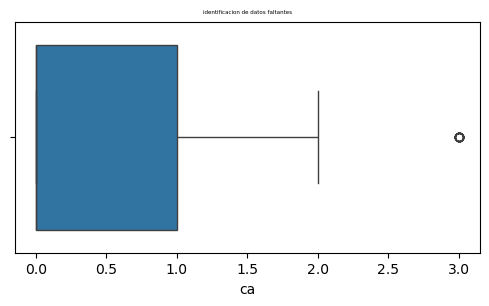

In [43]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['ca'])
plt.title('identificacion de datos faltantes', fontsize=4)


Text(0.5, 1.0, 'identificacion de datos faltantes')

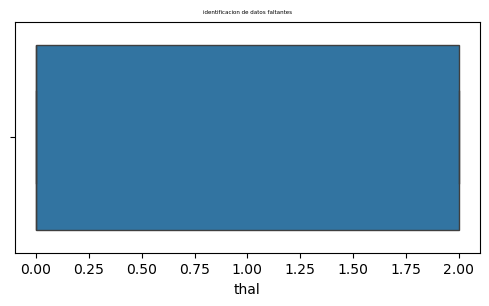

In [45]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['thal'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

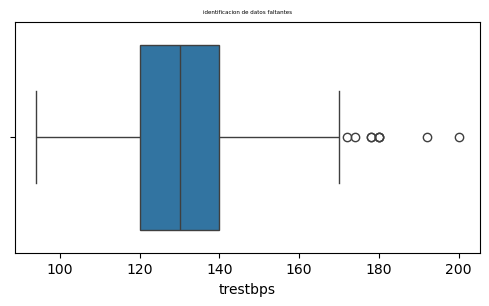

In [49]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['trestbps'])
plt.title('identificacion de datos faltantes', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos faltantes')

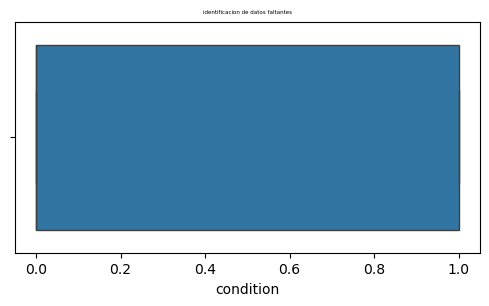

In [51]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['condition'])
plt.title('identificacion de datos faltantes', fontsize=4)


Text(0.5, 1.0, 'identificacion de datos faltantes')

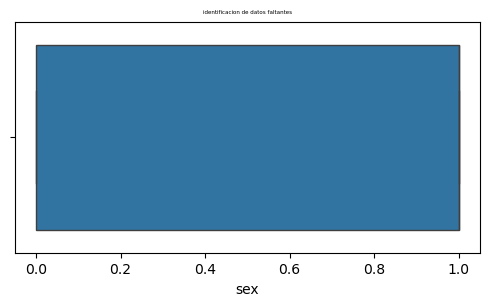

In [53]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['sex'])
plt.title('identificacion de datos faltantes', fontsize=4)

In [385]:
#PASO 2: Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
# REVISION DE DATOS FALTANTES 
#		exang 	oldpeak 	slope 	ca 	thal 	condition

print("cantidad de registros vacios en  age: ",hear_Disease['age'].isin([0]).sum())
print("cantidad de registros vacios en sex: ",hear_Disease['sex'].isin([0]).sum())
print("cantidad de registros vacios en cp: ",hear_Disease['cp'].isin([0]).sum())
print("cantidad de registros vacios en trestbps: ",hear_Disease['trestbps'].isin([0]).sum())
print("cantidad de registros vacios en chol: ",hear_Disease['chol'].isin([0]).sum())
print("cantidad de registros vacios en fbs: ",hear_Disease['fbs'].isin([0]).sum())
print("cantidad de registros vacios en restecg: ",hear_Disease['restecg'].isin([0]).sum())
print("cantidad de registros vacios en thalach: ",hear_Disease['thalach'].isin([0]).sum())
print("cantidad de registros vacios en exang: ",hear_Disease['exang'].isin([0]).sum())
print("cantidad de registros vacios en oldpeak: ",hear_Disease['oldpeak'].isin([0]).sum())
print("cantidad de registros vacios en slope: ",hear_Disease['slope'].isin([0]).sum())
print("cantidad de registros vacios en ca: ",hear_Disease['ca'].isin([0]).sum())
print("cantidad de registros vacios en thal: ",hear_Disease['thal'].isin([0]).sum())
print("cantidad de registros vacios en condition: ",hear_Disease['condition'].isin([0]).sum())



cantidad de registros vacios en  age:  0
cantidad de registros vacios en sex:  96
cantidad de registros vacios en cp:  23
cantidad de registros vacios en trestbps:  0
cantidad de registros vacios en chol:  0
cantidad de registros vacios en fbs:  254
cantidad de registros vacios en restecg:  147
cantidad de registros vacios en thalach:  0
cantidad de registros vacios en exang:  200
cantidad de registros vacios en oldpeak:  96
cantidad de registros vacios en slope:  139
cantidad de registros vacios en ca:  174
cantidad de registros vacios en thal:  164
cantidad de registros vacios en condition:  160


In [387]:
#reemplazar los datos con el valor medio (promedio de la columna 


hear_Disease['cp'] = hear_Disease['cp'].replace(0, hear_Disease['cp'].mean())
hear_Disease['fbs'] = hear_Disease['fbs'].replace(0, hear_Disease['fbs'].mean())
hear_Disease['restecg'] = hear_Disease['restecg'].replace(0, hear_Disease['restecg'].mean())
hear_Disease['exang'] = hear_Disease['exang'].replace(0, hear_Disease['exang'].mean())
hear_Disease['oldpeak'] = hear_Disease['oldpeak'].replace(0, hear_Disease['oldpeak'].mean())
hear_Disease['slope'] = hear_Disease['slope'].replace(0, hear_Disease['slope'].mean())
hear_Disease['ca'] = hear_Disease['ca'].replace(0, hear_Disease['ca'].mean())
hear_Disease['thal'] = hear_Disease['thal'].replace(0, hear_Disease['thal'].mean())
hear_Disease['condition'] = hear_Disease['condition'].replace(0, hear_Disease['condition'].mean())

                                                      

In [389]:
print("cantidad de registros vacios en  age: ",hear_Disease['age'].isin([0]).sum())
print("cantidad de registros vacios en sex: ",hear_Disease['sex'].isin([0]).sum())
print("cantidad de registros vacios en cp: ",hear_Disease['cp'].isin([0]).sum())
print("cantidad de registros vacios en trestbps: ",hear_Disease['trestbps'].isin([0]).sum())
print("cantidad de registros vacios en chol: ",hear_Disease['chol'].isin([0]).sum())
print("cantidad de registros vacios en fbs: ",hear_Disease['fbs'].isin([0]).sum())
print("cantidad de registros vacios en restecg: ",hear_Disease['restecg'].isin([0]).sum())
print("cantidad de registros vacios en thalach: ",hear_Disease['thalach'].isin([0]).sum())
print("cantidad de registros vacios en exang: ",hear_Disease['exang'].isin([0]).sum())
print("cantidad de registros vacios en oldpeak: ",hear_Disease['oldpeak'].isin([0]).sum())
print("cantidad de registros vacios en slope: ",hear_Disease['slope'].isin([0]).sum())
print("cantidad de registros vacios en ca: ",hear_Disease['ca'].isin([0]).sum())
print("cantidad de registros vacios en thal: ",hear_Disease['thal'].isin([0]).sum())
print("cantidad de registros vacios en condition: ",hear_Disease['condition'].isin([0]).sum())

cantidad de registros vacios en  age:  0
cantidad de registros vacios en sex:  96
cantidad de registros vacios en cp:  0
cantidad de registros vacios en trestbps:  0
cantidad de registros vacios en chol:  0
cantidad de registros vacios en fbs:  0
cantidad de registros vacios en restecg:  0
cantidad de registros vacios en thalach:  0
cantidad de registros vacios en exang:  0
cantidad de registros vacios en oldpeak:  0
cantidad de registros vacios en slope:  0
cantidad de registros vacios en ca:  0
cantidad de registros vacios en thal:  0
cantidad de registros vacios en condition:  0


Text(0.5, 1.0, 'identificacion de datos atipicos')

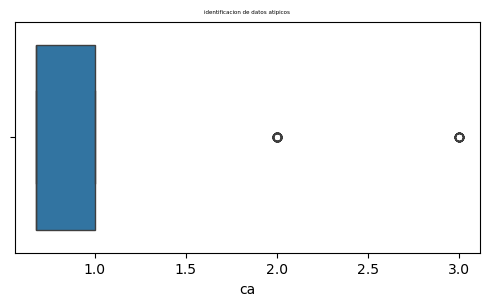

In [391]:
#datos atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['ca'])
plt.title('identificacion de datos atipicos', fontsize=4)

In [392]:
#conteo de datos
nivel_minimo=0
nivel_maximo=3
total_atipicos=((hear_Disease['ca']<nivel_minimo)|(hear_Disease['ca']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [395]:
nivel_minimo=0
nivel_maximo=3
total_atipicos=((hear_Disease['restecg']<nivel_minimo)|(hear_Disease['restecg']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


Text(0.5, 1.0, 'identificacion de datos atipicos')

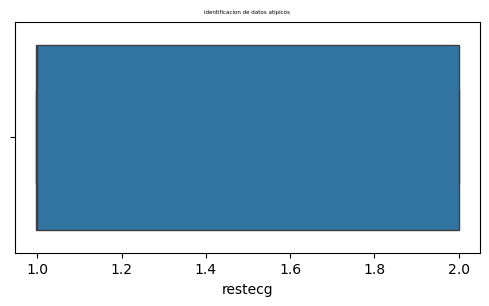

In [397]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['restecg'])
plt.title('identificacion de datos atipicos', fontsize=4)

Text(0.5, 1.0, 'identificacion de datos atipicos')

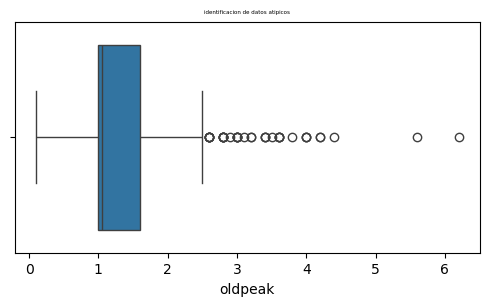

In [398]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['oldpeak'])
plt.title('identificacion de datos atipicos', fontsize=4)

In [400]:
nivel_minimo=0
nivel_maximo=6
total_atipicos=((hear_Disease['restecg']<nivel_minimo)|(hear_Disease['restecg']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


Text(0.5, 1.0, 'identificacion de datos faltantes')

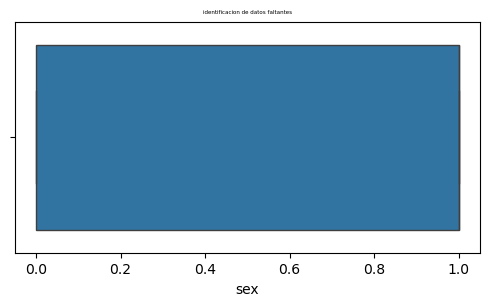

In [403]:
plt.figure(figsize=(6,3))
sns.boxplot(x=hear_Disease['sex'])
plt.title('identificacion de datos faltantes', fontsize=4)

In [405]:
nivel_minimo=0
nivel_maximo=6
total_atipicos=((hear_Disease['sex']<nivel_minimo)|(hear_Disease['sex']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [408]:
nivel_minimo=186
nivel_maximo=298
total_atipicos=((hear_Disease['chol']<nivel_minimo)|(hear_Disease['chol']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 73


In [410]:
total_atipicos = ((hear_Disease['chol'] < nivel_minimo) | (hear_Disease['chol'] > nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(total_atipicos))



El total de datos atípicos es 73


In [412]:
#filtrar datos atipicos para chol
hear_Disease=hear_Disease[(hear_Disease['chol']<nivel_maximo)&(hear_Disease['chol']>nivel_minimo)]



In [414]:
#aqui se valida si se removiron los valores atipicos 
total_atipicos=((hear_Disease['chol']<nivel_minimo)|(hear_Disease['chol']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))


el total de datos atipicos es 0


In [416]:
nivel_minimo=90
nivel_maximo=200
total_atipicos=((hear_Disease['trestbps']<nivel_minimo)|(hear_Disease['trestbps']>nivel_maximo)).sum()
print("el total de datos atipicos es {}".format(total_atipicos))

el total de datos atipicos es 0


In [418]:
# revision del tipo de datos y datos faltantes

hear_Disease.info()


<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        221 non-null    int64  
 1   sex        221 non-null    int64  
 2   cp         221 non-null    float64
 3   trestbps   221 non-null    int64  
 4   chol       221 non-null    int64  
 5   fbs        221 non-null    float64
 6   restecg    221 non-null    float64
 7   thalach    221 non-null    int64  
 8   exang      221 non-null    float64
 9   oldpeak    221 non-null    float64
 10  slope      221 non-null    float64
 11  ca         221 non-null    float64
 12  thal       221 non-null    float64
 13  condition  221 non-null    float64
dtypes: float64(9), int64(5)
memory usage: 25.9 KB


In [420]:
#PARTE 3:Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
#presencia de enfermedad cardíaca.
#- condition: Presencia de enfermedad cardíaca (1 = sí, 0 = no)
#predecir si una persona puede tener enfermedades cardiaca

In [435]:
#total de personas con enfermedades cardiacas
hear_Disease['condition'].value_counts()


condition
0.461279    122
1.000000     99
Name: count, dtype: int64

In [449]:
hear_Disease[['condition']].head(20)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [430]:
#PARTE 4 Dividir el dataset en Train y Test para evaluar correctamente el 3 modelo

In [513]:
# Porcentaje de datos para entrenamiento(train) =75% y para prueba (test) = 25%
# se crea variables  x y y para almacenar la informacion del entrenamiento 

X=hear_Disease.drop('condition',axis=1)
Y=hear_Disease['condition']

X_train, X_test,Y_train, Y_test =train_test_split(X , Y, test_size=0.25, stratify=Y, random_state=0)
                                                   

In [515]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [517]:
print(Y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [519]:
from sklearn.linear_model import LogisticRegression

In [521]:
#PASO 5:Entrenar el modelo configurando los diferentes hiperparámetros

#construir el modelo de regresion logistica 
modelo_regresionhear = LogisticRegression(solver="liblinear")
modelo_regresionhear.fit (X_train , Y_train)

Prediccion= modelo_regresionhear.predict(X_test)

In [523]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [525]:
print(Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [ ]:
#PUNTO 6 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc



In [529]:
#Desempeño del modelo de regresion

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



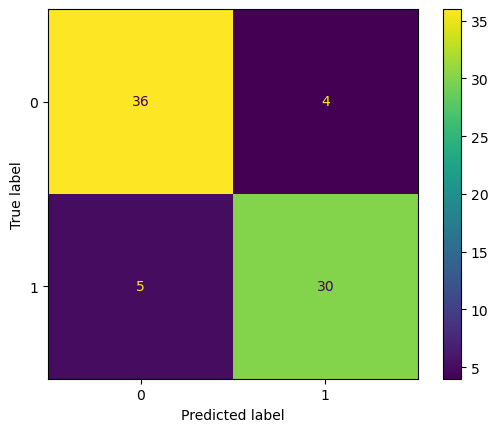

In [531]:
#PUNTO 7 GRAFICAS PARA VISUALOZAR RESULTADOS 
#matrix de confusion del modelo 

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [541]:
from sklearn.metrics import RocCurveDisplay

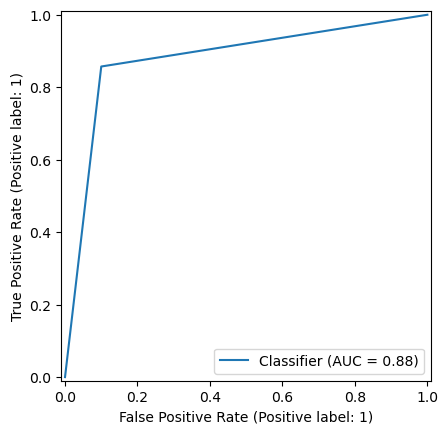

In [545]:
#curva d presison del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [ ]:
#interpretacion de resultados 
#Matriz de confusión:

La matriz de confusión 
 muestra que el modelo acertó en 36 casos donde la persona no tenía enfermedad cardíaca, y acertó en 30 casos donde sí la tenía.
También hubo 4 casos donde el modelo pensó que había enfermedad cuando en realidad no la había, y
5 casos donde pensó que no había enfermedad cuando sí la había.



Métricas de desempeño:

Precisión: 88% - Esto quiere decir que cuando el modelo dice que hay enfermedad, tiene un 88% de probabilidad de estar en lo correcto.
Exhaustividad: 86% - Esto significa que el modelo logra identificar la mayoría de los casos con enfermedad.
Puntaje F1: 87% - Este puntaje combina la precisión y exhaustividad, dando un buen balance general.
Exactitud: 88% - Esto indica que el modelo clasifica correctamente el 88% de los casos.

    Curva ROC y AUC:

La curva ROC muestra el desempeño del modelo a través de diferentes umbrales de clasificación.
El área bajo la curva ROC (AUC) es de 0.88, lo cual indica que el modelo tiene una buena capacidad predictiva.modelo de regresión logística entrenado presenta un buen desempeño en la predicción de la presencia de enfermedad cardíaca, 
    con métricas como precisión, exhaustividad y exactitud superiores al 85%. La curva ROC y el valor de AUC indican que el modelo es capaz de discriminar adecuadamente entre los casos con y sin enfermedad cardíaca. 
Estos resultados indican que el modelo puede ser utilizado para realizar predicciones confiables sobre la presencia de enfermedades cardíacas.